# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

## Index 5: Chicago Fed National Financial Conditions Credit Subindex (NFCI)

### NFCI
The Chicago Fed’s National Financial Conditions Index (NFCI) provides a comprehensive weekly update on U.S. financial conditions in money markets, debt and equity markets and the traditional and “shadow” banking systems. It is actually a weighted average of 105 measures of financial activity 😳.

Source: http://www.chicagofed.org/webpages/publications/nfci/index.cfm.

Value:
- Positive: financial conditions are tighter than average (slower economic growth)
- Negative: financial conditions are looser than average (higher inflation)

### NFCI's Credit Subindex
3 subindexes of the NFCI:
- risk
- credit (this data) - measures of credit conditions (tighten/loosen)
- leverage

##1. Installation Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime, timedelta

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index5')

Mounted at /content/drive


In [4]:
df = pd.read_csv('index-5-NFCICREDIT.csv') #Dataset file
df.head()

,DATE,NFCICREDIT
0,1971-01-08,-1.90407
1,1971-01-15,-1.90886
2,1971-01-22,-1.91133
3,1971-01-29,-1.91241
4,1971-02-05,-1.91255


In [10]:
# # set to datetime object index so we can plot in various frequencies
# index = pd.date_range(start='1971-01-08', end='2023-02-17', freq='W-FRI')
df.set_index(df['DATE'], inplace=True)
df.head()

,DATE,NFCICREDIT
DATE,,
1971-01-08,1971-01-08,-1.90407
1971-01-15,1971-01-15,-1.90886
1971-01-22,1971-01-22,-1.91133
1971-01-29,1971-01-29,-1.91241
1971-02-05,1971-02-05,-1.91255


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,NFCICREDIT
0,1971-01-08,-1.90407
1,1971-01-15,-1.90886
2,1971-01-22,-1.91133
3,1971-01-29,-1.91241
4,1971-02-05,-1.91255


In [6]:
df['DATE'].max() - df['DATE'].min()

Timedelta('19033 days 00:00:00')

In [ ]:
# df['Time'] = np.arange(len(df))
# df.head()

In [ ]:
# df['Lag_1w'] = df['NFCICREDIT'].shift(1)
# df.head()

## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

In [7]:
df.describe()

,NFCICREDIT
count,2.720000e+03
mean,9.558824e-08
std,1.000000e+00
min,-2.553480e+00
25%,-3.027500e-01
50%,-1.074600e-01
75%,1.990750e-01
max,3.617660e+00


- No NaNs

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        2720 non-null   datetime64[ns]
 1   NFCICREDIT  2720 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 42.6 KB


### 3.1 Raw Plot

In [ ]:
# # Weekly plot only (original data)
# df.set_index('DATE')['NFCICREDIT'].plot(figsize=(15,5))
# plt.title("Weekly NFCI Credit")

In [11]:
df_weekly = df['NFCICREDIT']
df_monthly = df['NFCICREDIT'].resample('M').mean()
df_quarterly = df['NFCICREDIT'].resample('Q').mean()
df_yearly = df['NFCICREDIT'].resample('Y').mean()

In [12]:
def add_recession_region():
  # recession (grey block)
  recession_periods = [('1973-11-01', '1975-03-01'), ('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'), ('1990-07-01', '1991-03-01'),
                     ('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01'), ('2020-02-01', '2020-04-01')]

  for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

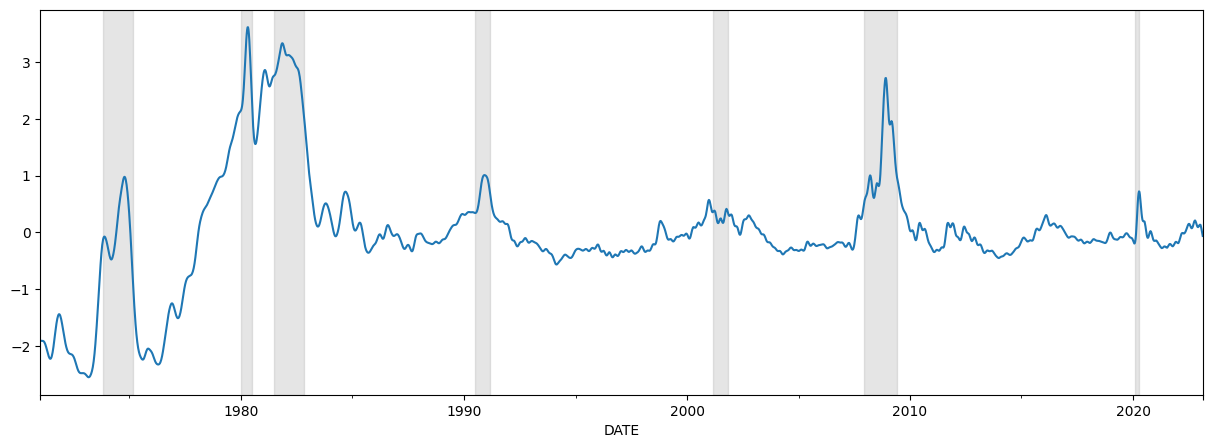

In [13]:
df_weekly.plot(figsize=(15,5), label="Weekly")
add_recession_region()
plt.show()

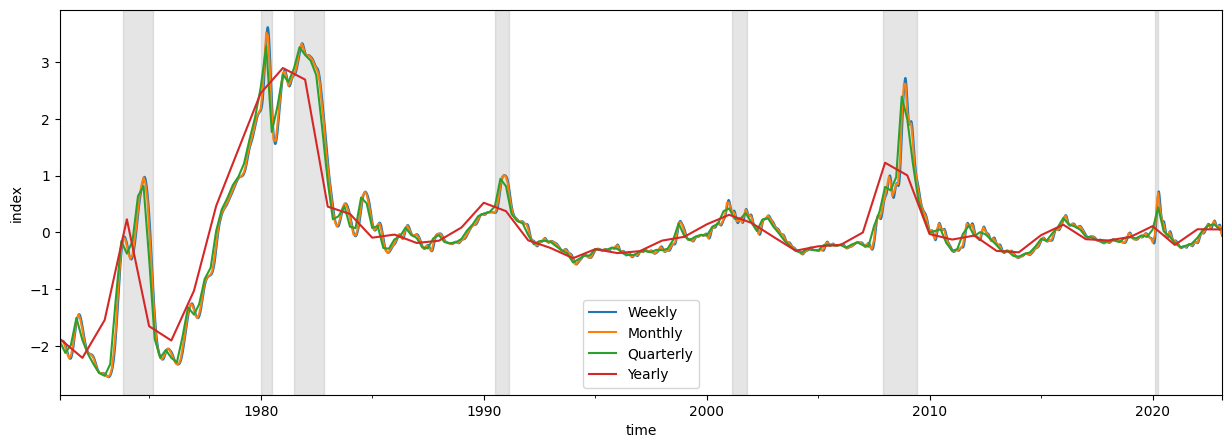

In [ ]:
# Plot from all data in weekly, monthly, quarterly
plot_whole = df_weekly.plot(figsize=(15,5), label="Weekly")
df_monthly.plot(figsize=(15,5), ax=plot_whole, label="Monthly")
df_quarterly.plot(figsize=(15,5), ax=plot_whole, label="Quarterly")
df_yearly.plot(figsize=(15,5), ax=plot_whole, label="Yearly")
add_recession_region()

plt.xlabel('time')
plt.ylabel('index')
plt.legend()
plt.show()

In [ ]:
# # Plot from first 50+ data
# plot_short = df['NFCICREDIT'][:50].plot(figsize=(15,5), label="Weekly")
# df['NFCICREDIT'][:50].resample('M').mean().plot(figsize=(15,5), ax=plot_short, label="Monthly")
# df['NFCICREDIT'][:53].resample('Q').mean().plot(figsize=(15,5), ax=plot_short, label="Quarterly")
# plt.legend()
# plt.show()

In [ ]:
# / recession (grey block)
# / pct_change (yearly)
# why bf 1985 so large amplitude?
# other eda (ma, ar, fourier)
# time series decomposition

### 3.2 Percent Change

#### Weekly

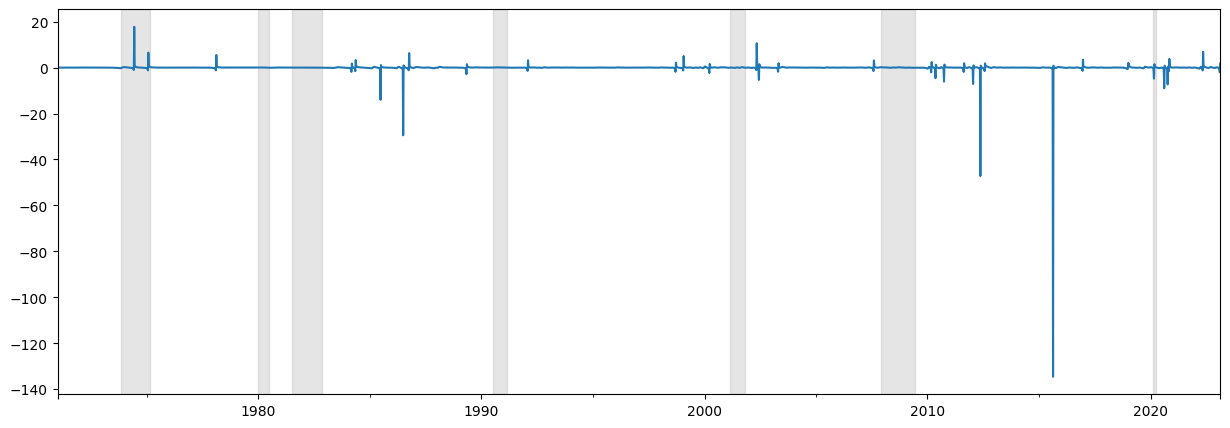

In [ ]:
df_weekly.pct_change().plot(figsize=(15,5))
add_recession_region()
plt.show()

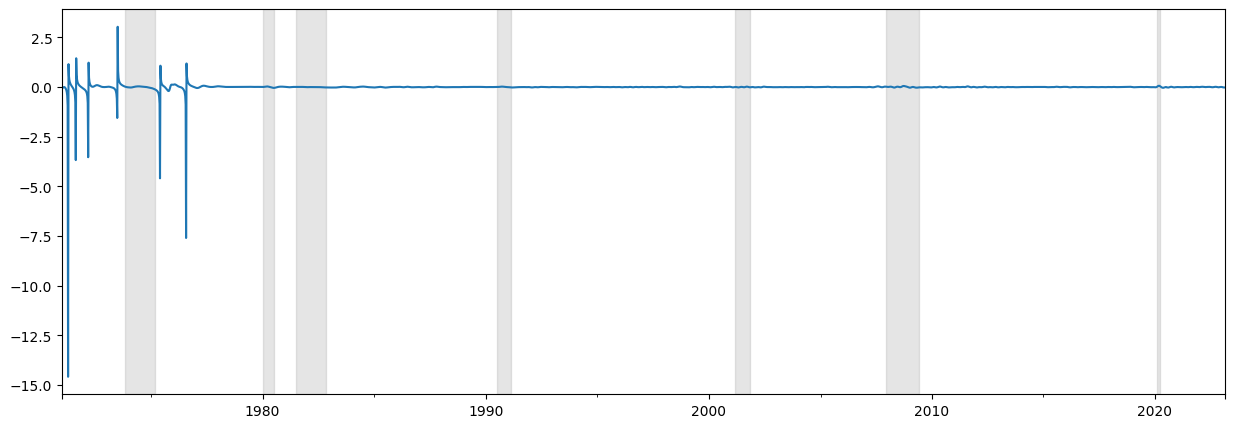

In [ ]:
df_weekly_mod = df_weekly + 2 # shift up to prevent zero division
df_weekly_mod.pct_change().plot(figsize=(15,5))
add_recession_region()
plt.show()

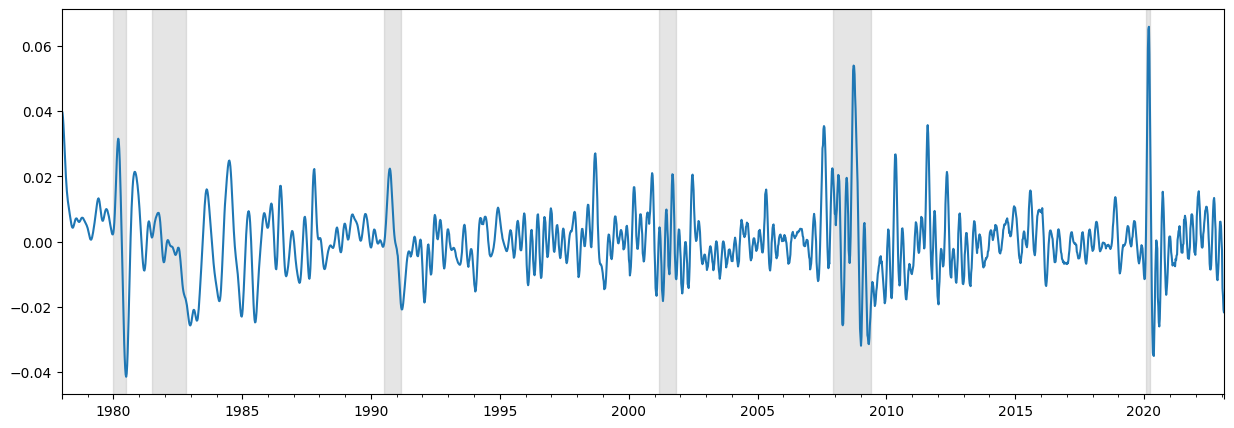

In [ ]:
df_weekly_mod = df_weekly_mod['1978-01-01':] # remove extreme cases (1971-1978)
df_weekly_mod.pct_change().plot(figsize=(15,5))
add_recession_region()
plt.show()

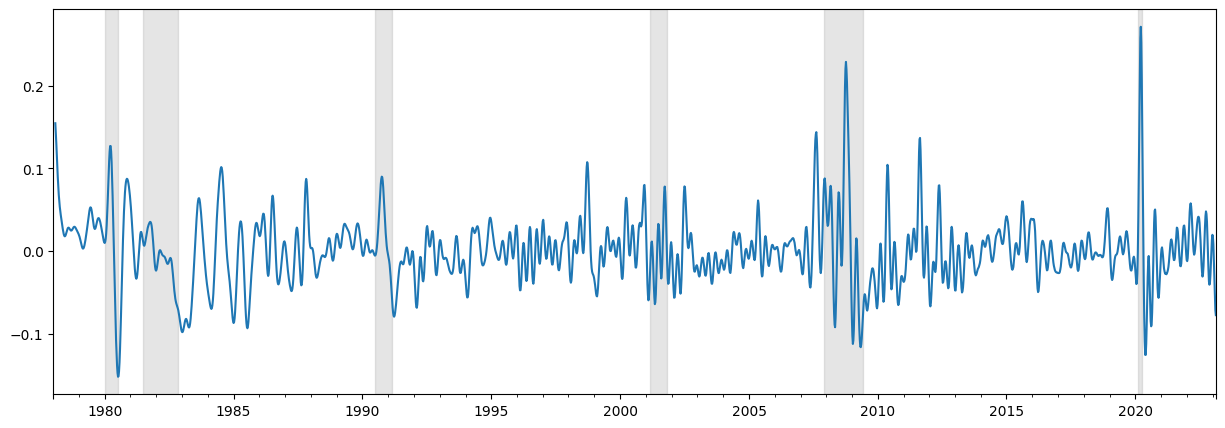

In [ ]:
df_weekly_mod.pct_change(periods=4).plot(figsize=(15,5)) # monthly -> similar to weekly
add_recession_region()
plt.show()

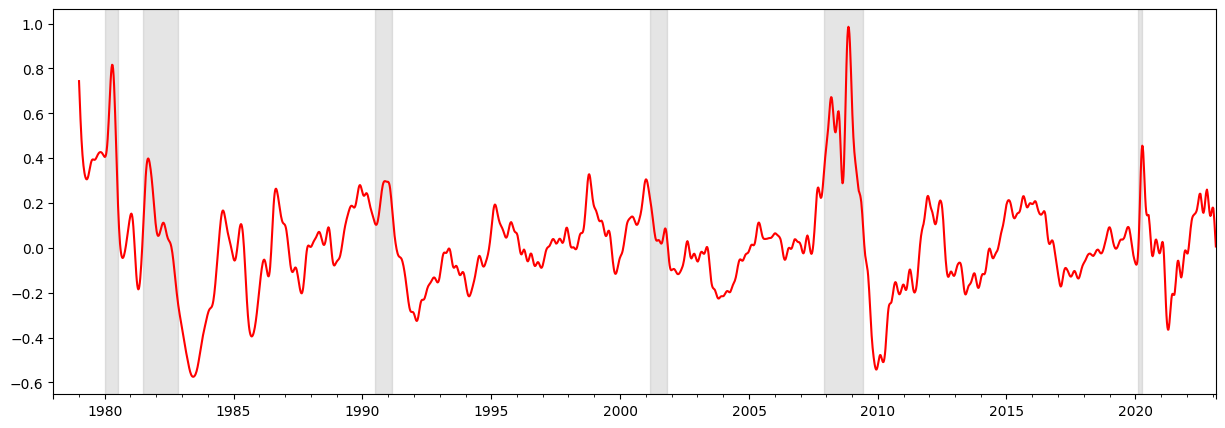

In [ ]:
df_weekly_mod.pct_change(periods=52).plot(figsize=(15,5), color='red') # yearly
add_recession_region()
plt.show()

#### Monthly

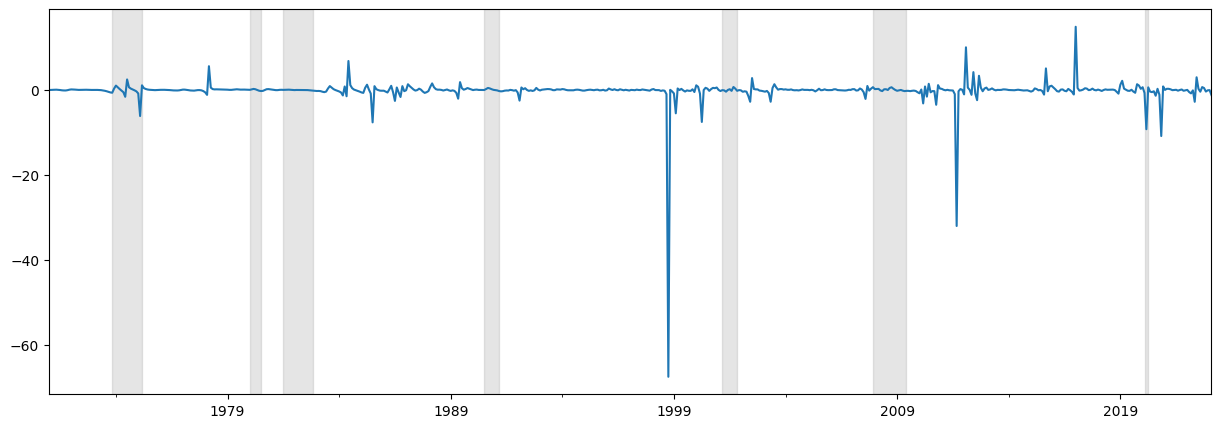

In [ ]:
df_monthly.pct_change().plot(figsize=(15,5))
add_recession_region()
plt.show()

Shift up by 2 + drop out data before 1978

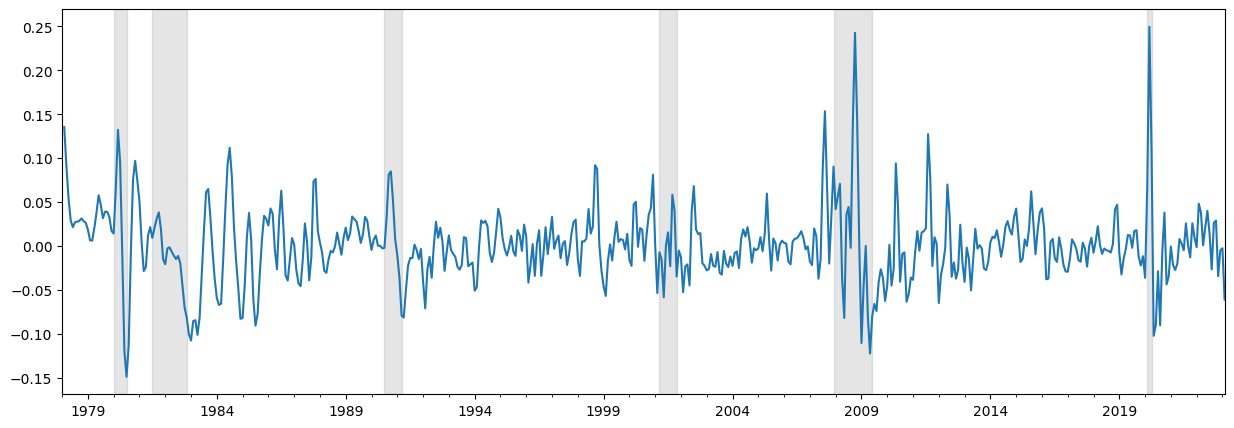

In [ ]:
df_monthly_mod = df_monthly + 2
df_monthly_mod = df_monthly_mod['1978-01-01':]
df_monthly_mod.pct_change().plot(figsize=(15,5))
add_recession_region()
plt.show()

The range is around [-0.6, 1.0], so no need of normalization?

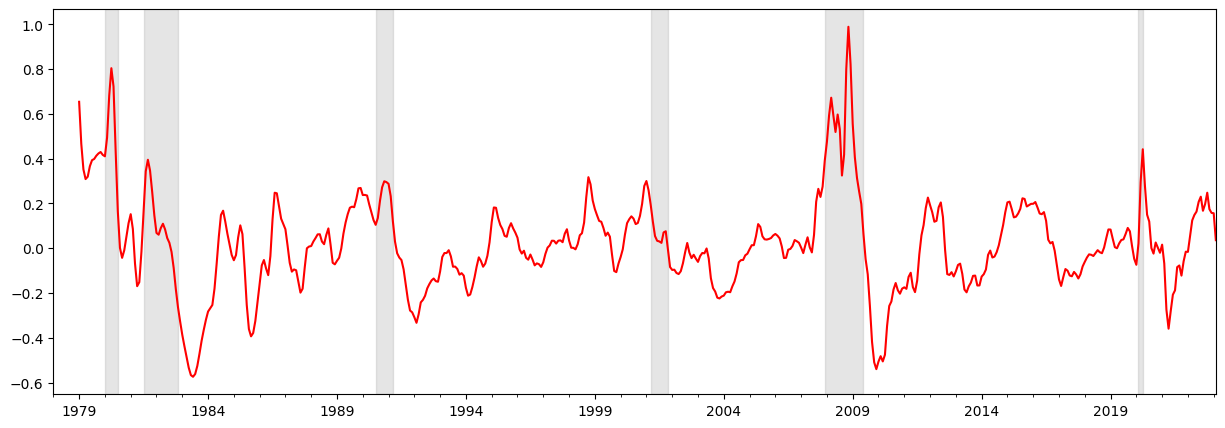

In [ ]:
# Percent change from a year ago (should be the same with the above)
df_monthly_mod.pct_change(periods=12).plot(figsize=(15,5), color='red')
add_recession_region()
plt.show()

### 3.3 Decomposition 

Summary:
- seasonal period = Yearly ok

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(20)

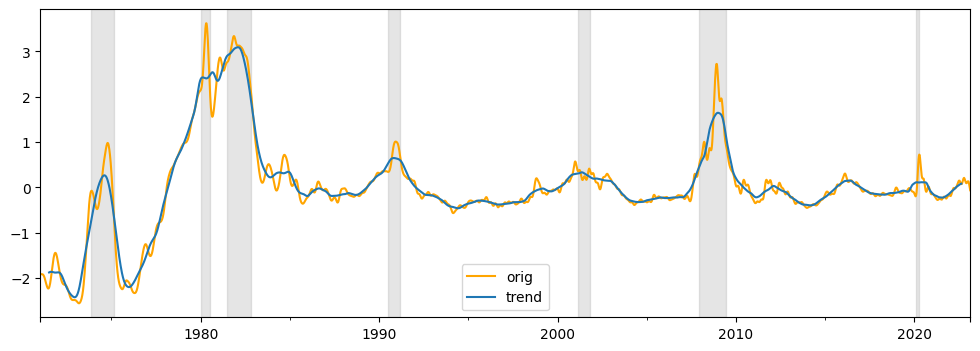

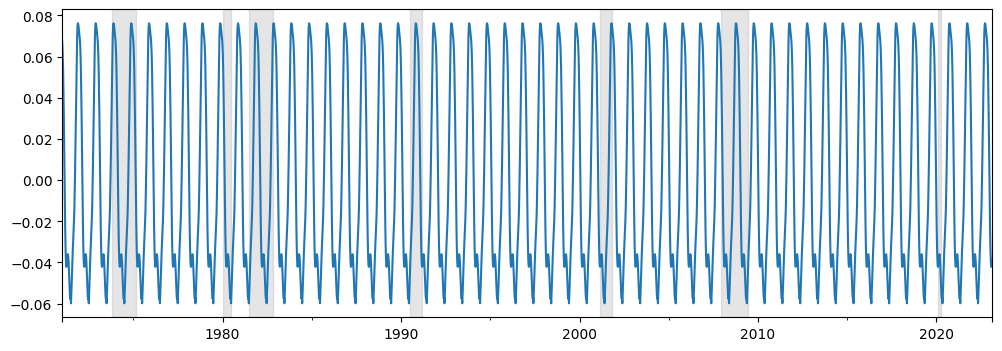

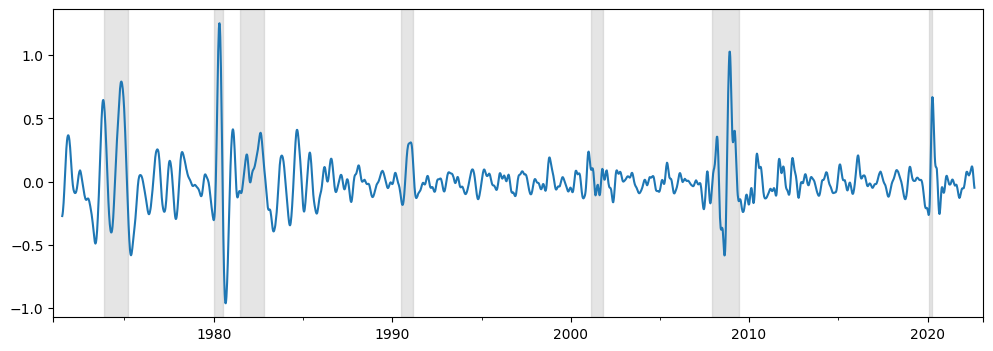

In [ ]:
# Weekly
# Plot the decomposition for additive series
decomposition = seasonal_decompose(df_weekly, model='additive')
# decomposition_plot_weekly.plot()
# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df_weekly.plot(figsize=(12,4), color="orange", label="orig")
trend.plot(figsize=(12,4), label="trend")
add_recession_region()
plt.legend()
plt.show()

seasonal.plot(figsize=(12,4))
add_recession_region()
plt.show()

residual.plot(figsize=(12,4))
add_recession_region()
plt.show()

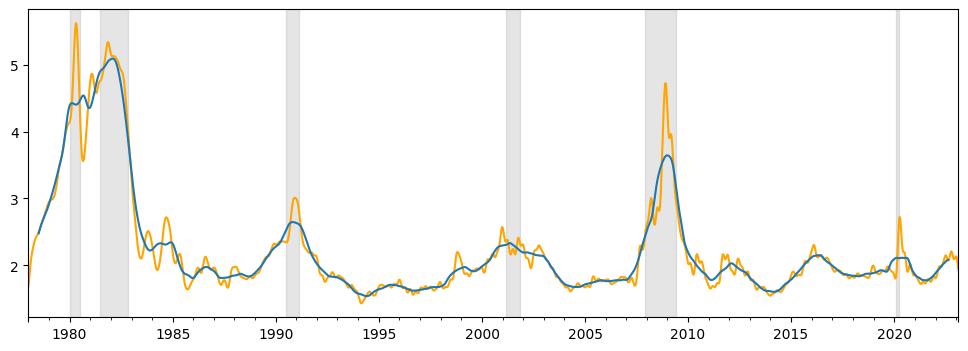

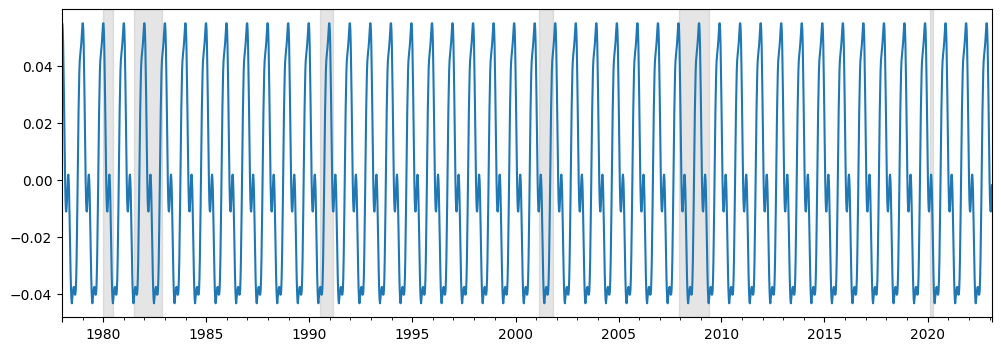

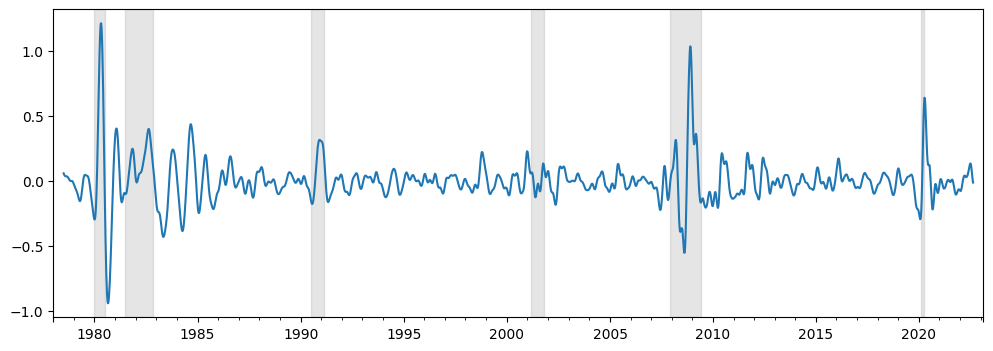

In [ ]:
# Weekly Mod (shifting up by 2 + drop out data before 1978)
# Plot the decomposition for additive series
decomposition = seasonal_decompose(df_weekly_mod, model='additive')
# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df_weekly_mod.plot(figsize=(12,4), color="orange", label="orig")
trend.plot(figsize=(12,4), label="trend")
add_recession_region()
plt.show()

seasonal.plot(figsize=(12,4))
add_recession_region()
plt.show()

residual.plot(figsize=(12,4))
add_recession_region()
plt.show()

Compare: no difference (the mod only help to observe pct change)

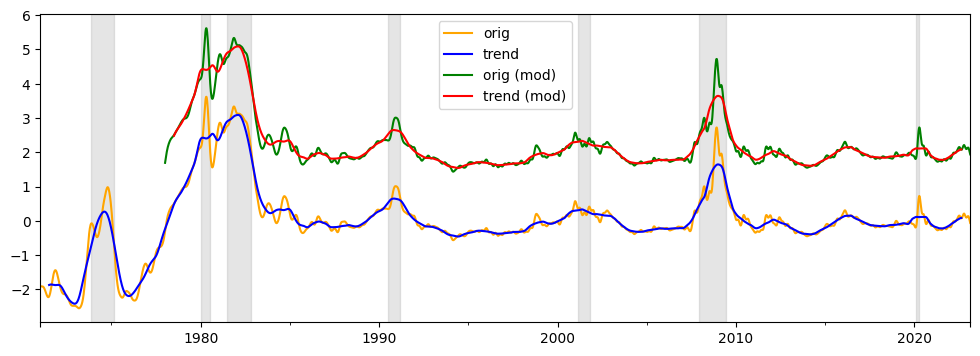

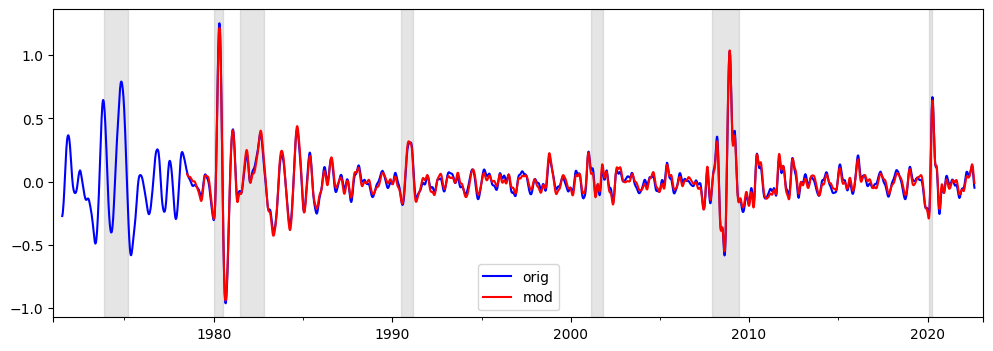

In [ ]:
# Compare two weekly plots -> no diff (just shifted...)
decomposition_1 = seasonal_decompose(df_weekly, model='additive')
decomposition_2 = seasonal_decompose(df_weekly_mod,  model='additive')

df_weekly.plot(figsize=(12,4), color="orange", label="orig")
decomposition_1.trend.plot(figsize=(12,4), color="blue", label="trend")
df_weekly_mod.plot(figsize=(12,4), color="green", label="orig (mod)")
decomposition_2.trend.plot(figsize=(12,4), color="red", label="trend (mod)")
add_recession_region()
plt.legend()
plt.show()

decomposition_1.resid.plot(figsize=(12,4), color="blue", label="orig")
decomposition_2.resid.plot(figsize=(12,4), color="red", label="mod")
add_recession_region()
plt.legend()
plt.show()

### Varying seasonal period
- Period = Monthly
  - Result: Trend is almost the same to the original plot (very small residual; around [-0.03, 0.03])

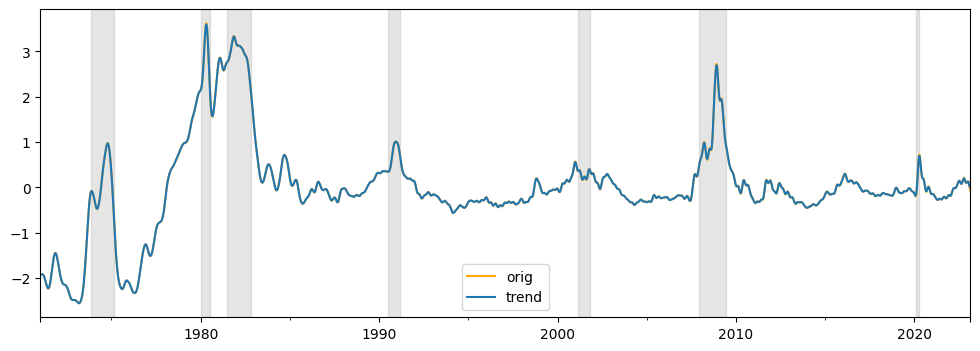

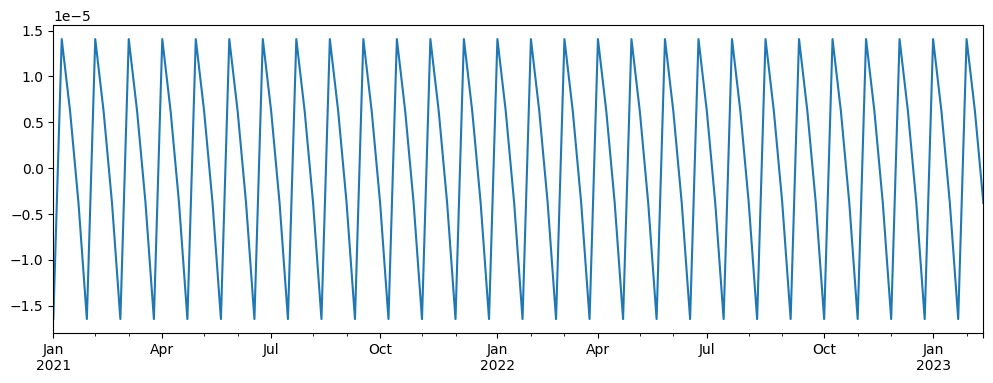

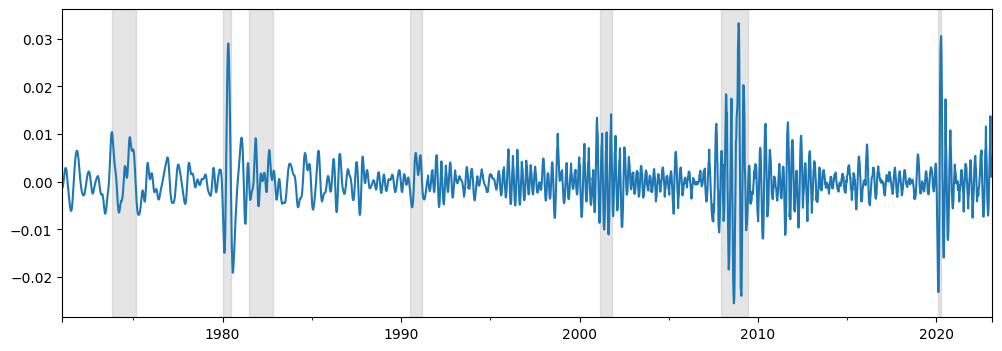

In [ ]:
# Varying seasonality: Monthly
# Plot the decomposition for additive series
decomposition = seasonal_decompose(df_weekly, period=4, model='additive')
# decomposition_plot_weekly.plot()
# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df_weekly.plot(figsize=(12,4), color="orange", label="orig")
trend.plot(figsize=(12,4), label="trend")
add_recession_region()
plt.legend()
plt.show()

# seasonal.plot(figsize=(12,4)) # too high freq
seasonal['2021-01-01':'2023-02-17'].plot(figsize=(12,4))
add_recession_region()
plt.show()

residual.plot(figsize=(12,4))
add_recession_region()
plt.show()

- Period: Quarterly (13 weeks)
  - Result: trend is still very similar to the original plot (residuala around [-0.2, 0.2])

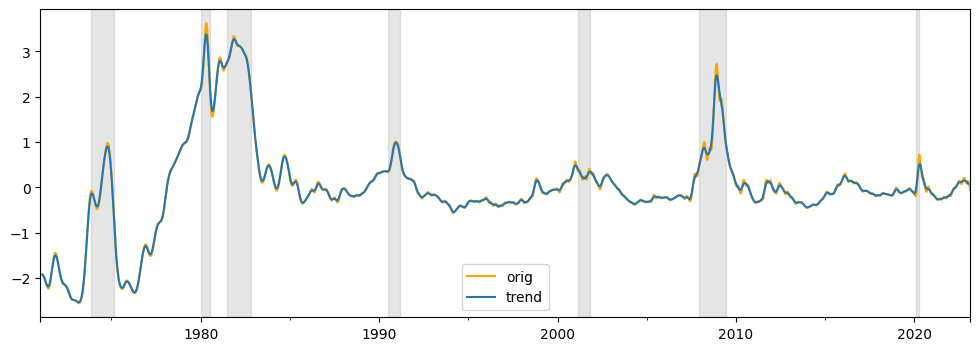

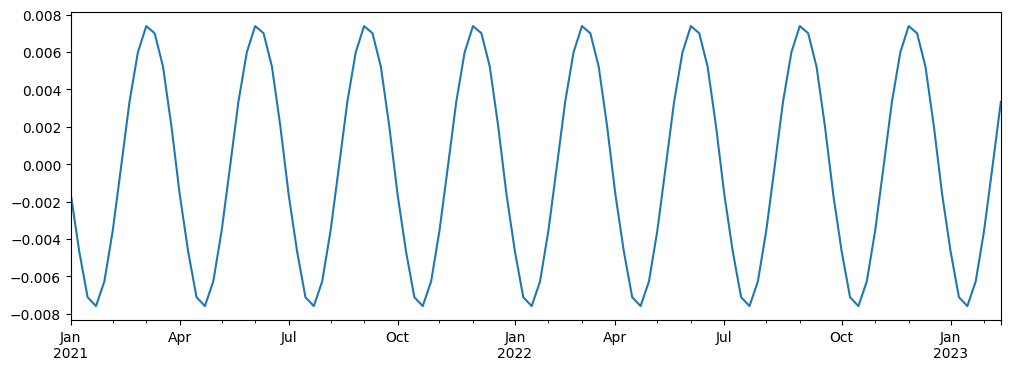

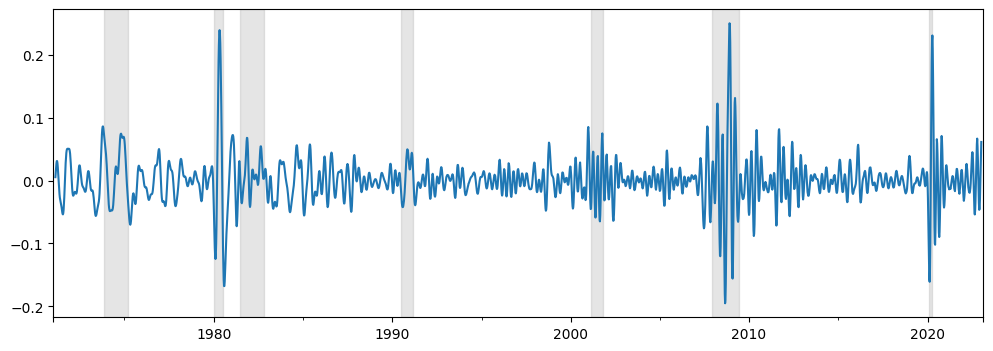

In [ ]:
# Varying seasonality: Quarterly
# Plot the decomposition for additive series
decomposition = seasonal_decompose(df_weekly, period=13, model='additive')
# decomposition_plot_weekly.plot()
# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df_weekly.plot(figsize=(12,4), color="orange", label="orig")
trend.plot(figsize=(12,4), label="trend")
add_recession_region()
plt.legend()
plt.show()

# seasonal.plot(figsize=(12,4)) # too high freq
seasonal['2021-01-01':'2023-02-17'].plot(figsize=(12,4))
add_recession_region()
plt.show()

residual.plot(figsize=(12,4))
add_recession_region()
plt.show()

- Period: 2 years
- Result: trend's peaks smoothier and less ambiguous at around 1998-2002, but too smooth at arounf 1980, 2020

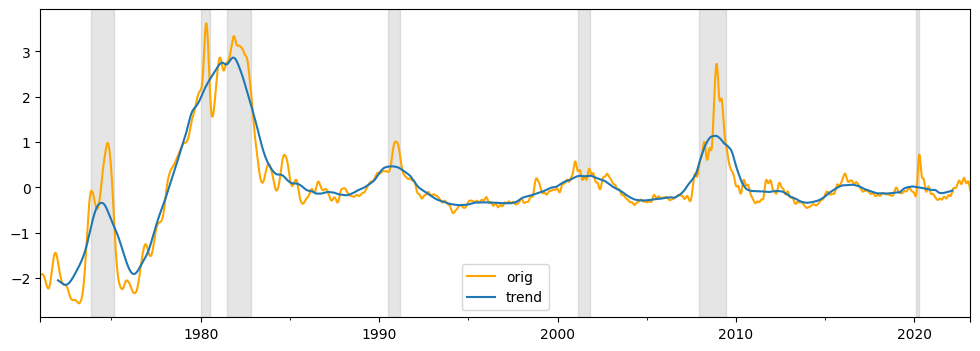

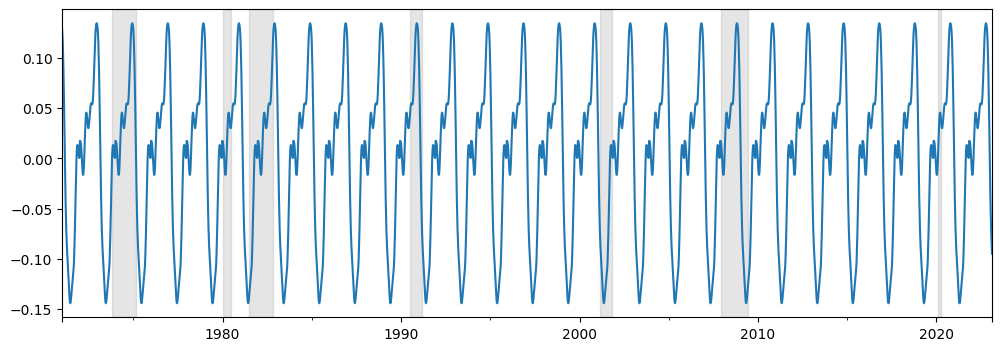

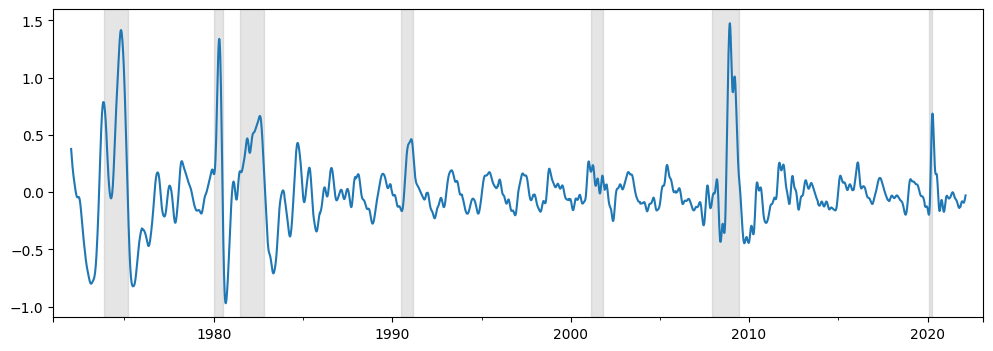

In [ ]:
# Varying seasonality: 2 years
# Plot the decomposition for additive series
decomposition = seasonal_decompose(df_weekly, period=104, model='additive')
# decomposition_plot_weekly.plot()
# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df_weekly.plot(figsize=(12,4), color="orange", label="orig")
trend.plot(figsize=(12,4), label="trend")
add_recession_region()
plt.legend()
plt.show()

seasonal.plot(figsize=(12,4)) # too high freq
# seasonal['2021-01-01':'2023-02-17'].plot(figsize=(12,4))
add_recession_region()
plt.show()

residual.plot(figsize=(12,4))
add_recession_region()
plt.show()

- Period: 3 Years

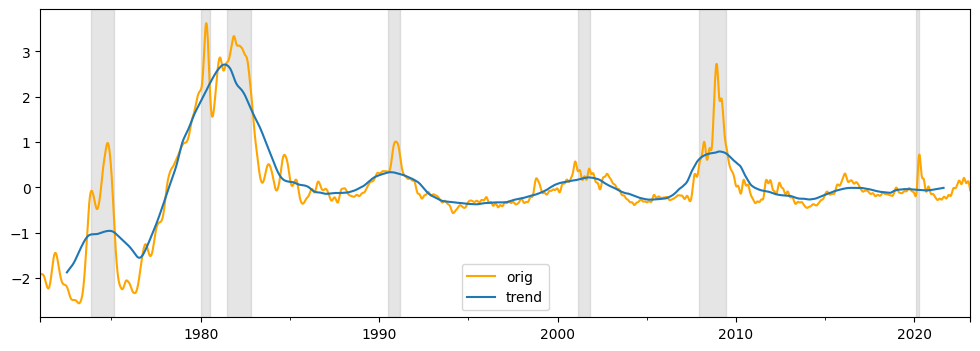

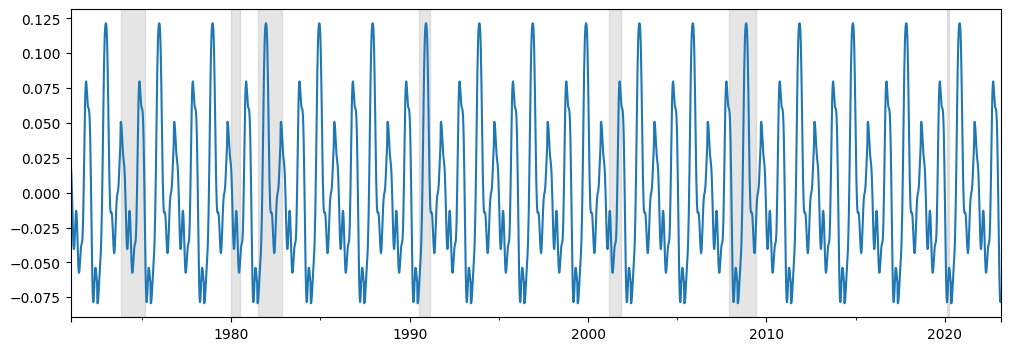

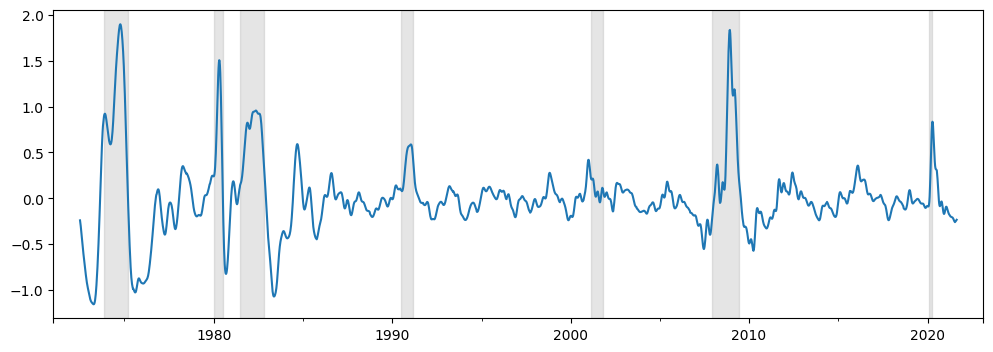

In [ ]:
# Varying seasonality: 3 years
# Plot the decomposition for additive series
decomposition = seasonal_decompose(df_weekly, period=156, model='additive')
# decomposition_plot_weekly.plot()
# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df_weekly.plot(figsize=(12,4), color="orange", label="orig")
trend.plot(figsize=(12,4), label="trend")
add_recession_region()
plt.legend()
plt.show()

seasonal.plot(figsize=(12,4)) # too high freq
# seasonal['2021-01-01':'2023-02-17'].plot(figsize=(12,4))
add_recession_region()
plt.show()

residual.plot(figsize=(12,4))
add_recession_region()
plt.show()

In [ ]:
# # Monthly
# # Plot the decomposition for additive series
# decomposition = seasonal_decompose(df_monthly, model='additive')
# # decomposition_plot_weekly.plot()
# # Extract the trend, seasonal, and residual components
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# df_monthly.plot(figsize=(12,4), color="orange", label="orig")
# trend.plot(figsize=(12,4), label="trend")
# add_recession_region()
# plt.show()

# seasonal.plot(figsize=(12,4))
# add_recession_region()
# plt.show()

# residual.plot(figsize=(12,4))
# add_recession_region()
# plt.show()

In [ ]:
# lag plot
# stationarity

## Relations to Recession

### 1. Raw data plot
- Weekly: Recession starts at around the same time with sudden increasing slope (except 2001).
- Yearly: Increasing slope comes before, and recession starts a bit after each local maximum peak.

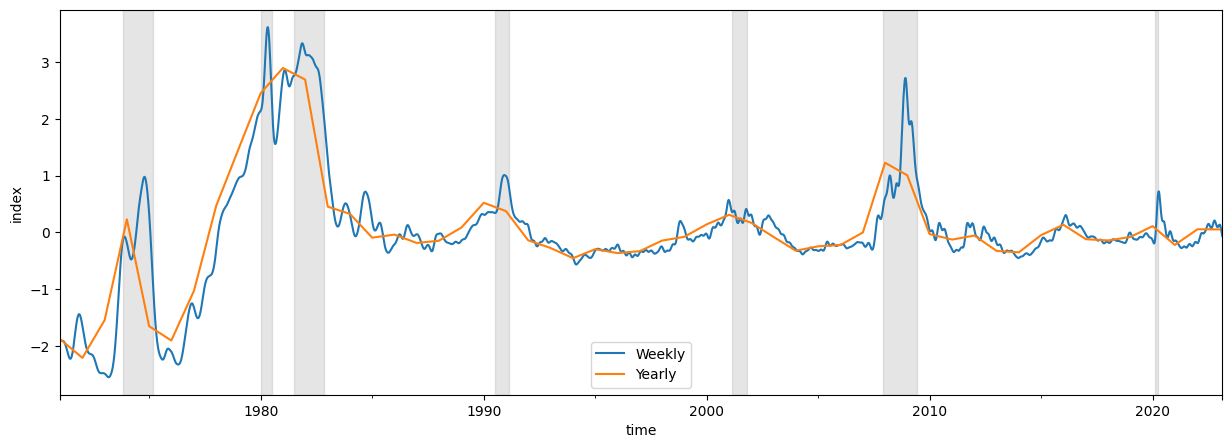

In [ ]:
# Plot from all data in weekly, yearly
plot_whole = df_weekly.plot(figsize=(15,5), label="Weekly")
df_yearly.plot(figsize=(15,5), ax=plot_whole, label="Yearly")
add_recession_region()

plt.xlabel('time')
plt.ylabel('index')
plt.legend()
plt.show()

### Percent Change
pct change compared to value from one year ago. The index is shifted up by 2 to prevent zero division.

=> No significant trend?

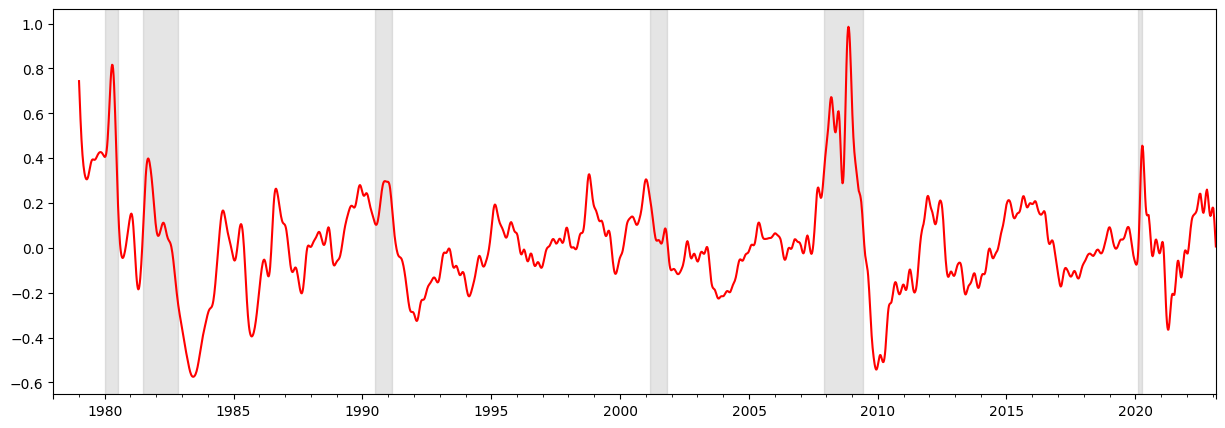

In [ ]:
df_weekly_mod.pct_change(periods=52).plot(figsize=(15,5), color='red') # yearly
add_recession_region()
plt.show()

### Decomposition
- Trend: smoothier than the raw data plot while making the 'trend' of recession more clear (increasing before recession).
- Seasonal: recession starts ตอนกำลังลง?
- Residual: recession at weird peak?

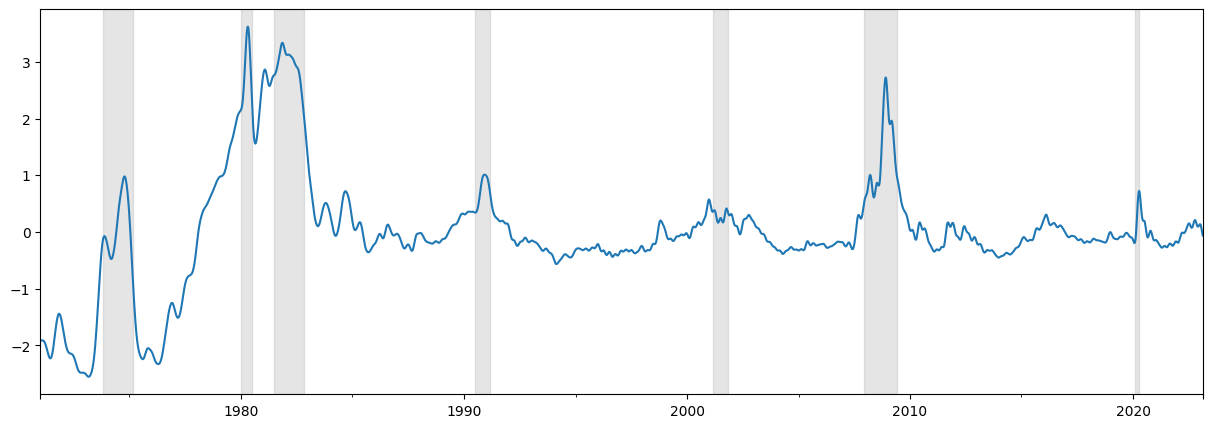

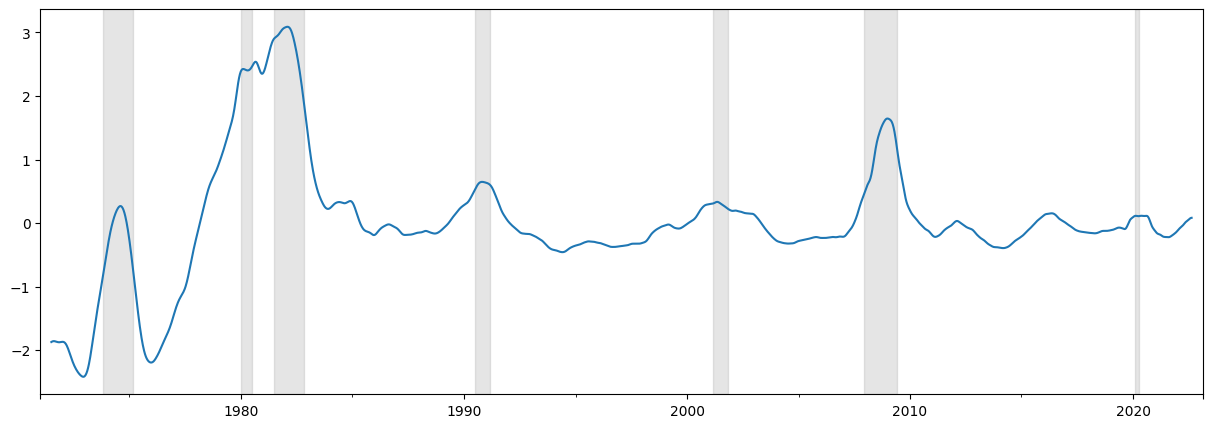

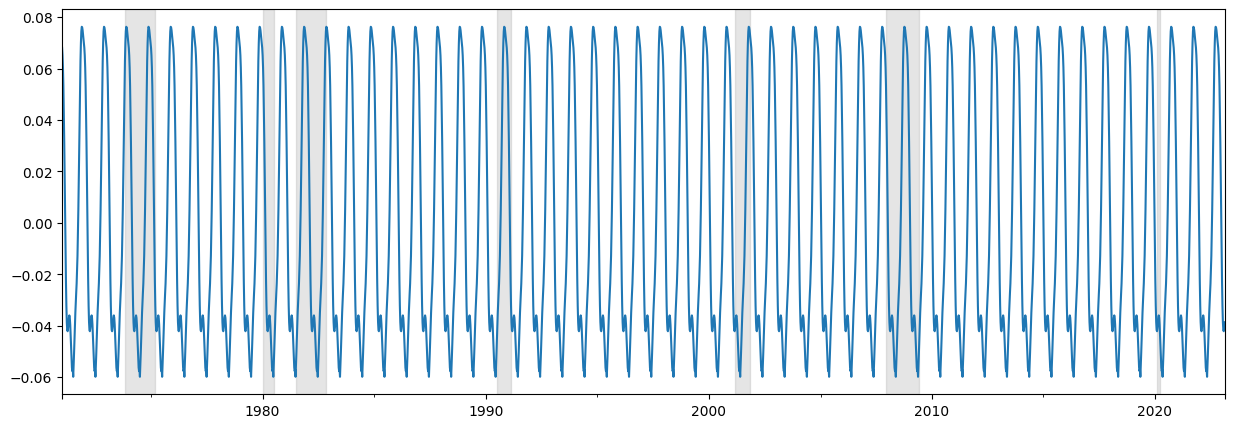

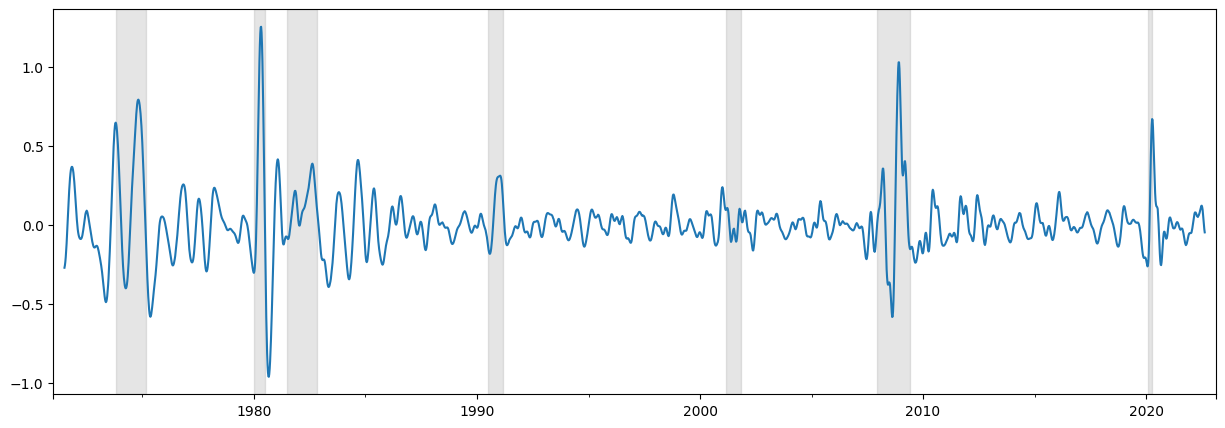

In [ ]:
# Weekly
# Plot the decomposition for additive series
decomposition = seasonal_decompose(df_weekly, model='additive')
# decomposition_plot_weekly.plot()
# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df_weekly.plot(figsize=(15,5))
add_recession_region()
plt.show()
trend.plot(figsize=(15,5))
add_recession_region()
plt.show()
seasonal.plot(figsize=(15,5))
add_recession_region()
plt.show()
residual.plot(figsize=(15,5))
add_recession_region()
plt.show()

# Models

## Data Preprocessing

In [6]:
df['Time'] = np.arange(len(df))
df['Lag_1w'] = df['NFCICREDIT'].shift(1)
df.head()

,DATE,NFCICREDIT,Time,Lag_1w
1971-01-08,1971-01-08,-1.90407,0,NaN
1971-01-15,1971-01-15,-1.90886,1,-1.90407
1971-01-22,1971-01-22,-1.91133,2,-1.90886
1971-01-29,1971-01-29,-1.91241,3,-1.91133
1971-02-05,1971-02-05,-1.91255,4,-1.91241


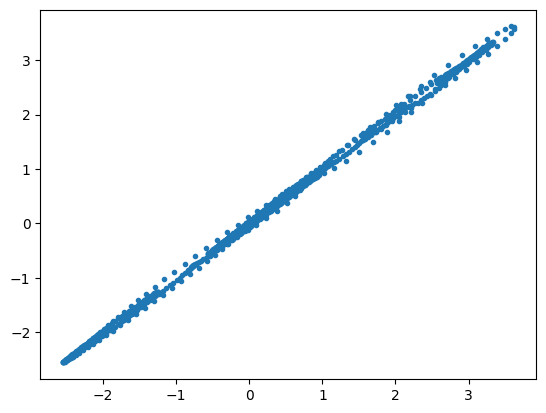

In [ ]:
# arai wa 555+
fig, ax = plt.subplots()
ax.plot(df['NFCICREDIT'], df['Lag_1w'], '.');

To-do:
- ✅ assign labels to each time step (1: recession within X months, 0: non-recession)
- try with a simple model (linear or logistic regression)

In [26]:
THRES_MONTH = 6 # we will consider recession within THRES_MONTH months
recession_periods = [('1973-11-01', '1975-03-01'), ('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'), ('1990-07-01', '1991-03-01'),
                     ('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01'), ('2020-02-01', '2020-04-01')]

def get_is_recession(date):
  for period in recession_periods:
    if date >= pd.to_datetime(period[0]) + pd.DateOffset(months=-THRES_MONTH) and date <= pd.to_datetime(period[1]):
      return 1
  return 0

df['is_recession'] = df['DATE'].map(get_is_recession)
df['1973-04-01':'1974-01-01']

,DATE,NFCICREDIT,is_recession
DATE,,,
1973-04-06,1973-04-06,-2.52859,0
1973-04-13,1973-04-13,-2.51344,0
1973-04-20,1973-04-20,-2.49494,0
1973-04-27,1973-04-27,-2.47244,0
1973-05-04,1973-05-04,-2.44525,1
1973-05-11,1973-05-11,-2.41299,1
1973-05-18,1973-05-18,-2.37420,1
1973-05-25,1973-05-25,-2.32808,1
1973-06-01,1973-06-01,-2.27374,1
